# Process the Data 

### Create list of header names for the features and labels

In [19]:
#Create the Feature Table Names

feature_table_names = []


#col_names = ['right_FP_x', 'right_FP_y', 'right_FP_z', 
#          'left_FP_x', 'left_FP_y', 'left_FP_z', 
#          'shank_acc_x', 'shank_acc_y', 'shank_acc_z', 'shank_gyro_x', 'shank_gyro_y', 'shank_gyro_z' ,
#          'foot_acc_x', 'foot_acc_y', 'foot_acc_z', 'foot_gyro_x', 'foot_gyro_y', 'foot_gyro_z', 
#          'thigh_acc_x', 'thigh_acc_y', 'thigh_acc_z', 'thigh_gyro_x', 'thigh_gyro_y', 'thigh_gyro_z', 
#          'torso_acc_x', 'torso_acc_y', 'torso_acc_z', 'torso_gyro_x', 'torso_gyro_y', 'torso_gyro_z',
#          'hip_angle', 'knee_angle', 'L5_S1_flex_angle']
col_names = [
            'shank_acc_x', 'shank_acc_y', 'shank_acc_z', 'shank_gyro_x', 'shank_gyro_y', 'shank_gyro_z' ,
           'foot_acc_x', 'foot_acc_y', 'foot_acc_z', 'foot_gyro_x', 'foot_gyro_y', 'foot_gyro_z', 
           'thigh_acc_x', 'thigh_acc_y', 'thigh_acc_z', 'thigh_gyro_x', 'thigh_gyro_y', 'thigh_gyro_z', 
          'torso_acc_x', 'torso_acc_y', 'torso_acc_z', 'torso_gyro_x', 'torso_gyro_y', 'torso_gyro_z'
          ]
col_feat = ['min_','max_', 'mean_', 'std_', 'end_']


#feature_table_length = col_names*col_feat

for i in range(len(col_names)):
    for j in range(len(col_feat)):
    
        
        feature_table_names.append(col_feat[j]+col_names[i])

        
        



        
#Create labels for ground truth labels
ground_truth_names = ['hip_torque','knee_torque', 'L5_S1_flex_torque']


#print(feature_table_names)
    
#len(feature_table_names)

### 1) Read data from file, 2) stack the train sets on top of each other, 3) and set test dataset

In [20]:
#Stack Data for training

import pandas as pd


test_trial = 1
lift_type = 'WK'
lift_degree = 0
subject_num = 4

if test_trial == 1:
    start_i = 2
else:
    start_i = 1

file = "D:/Dropbox (GaTech)/DOE_Exos/Experiments/Analysis/scale_ik_id/results/feature_tables/100_ms_window_20_ms_increment/DOE_Biomech_0"+str(subject_num)+"_L_"+str(lift_degree)+"_"+lift_type+"_0"+str(start_i)+".csv"

    
    
message = "--- Adding Trial "+ str(start_i) + " to the training data ---"
print(message)

#combined_data = pd.read_csv(file, names = feature_table_names)
data_train = pd.read_csv(file)
print("Data Row: "+str(data_train.shape[0]))
#print('Trial: '+str(i))
#print(combined_data.info())
#print('------------------------------')

for i in range(start_i+1,8):
    if i == test_trial:
        message = "--- Trial "+str(i)+" is test Trial --- "
        print(message)
    else:
        #print(i)
        message = "--- Adding Trial "+ str(i) + " to the training data ---"
        print(message)
        file = "D:/Dropbox (GaTech)/DOE_Exos/Experiments/Analysis/scale_ik_id/results/feature_tables/100_ms_window_20_ms_increment/DOE_Biomech_0"+str(subject_num)+"_L_"+str(lift_degree)+"_"+lift_type+"_0"+str(i)+".csv"
        #data = pd.read_csv(file, names = feature_table_names)
        data = pd.read_csv(file)
        print("Data Row: "+str(data.shape[0]))
        #print('Trial: '+str(i))
        #print(data.info())
        #print('------------------------------')
        data_train = pd.concat([data_train,data],ignore_index=True)


print('Train Trials:')
print(data_train.info())

#drop features from dataframe



#feature_table_length = col_names*col_feat



#print(combined_data.std_right_FP_x)

#Get data for test
file = "D:/Dropbox (GaTech)/DOE_Exos/Experiments/Analysis/scale_ik_id/results/feature_tables/100_ms_window_20_ms_increment/DOE_Biomech_0"+str(subject_num)+"_L_"+str(lift_degree)+"_"+lift_type+"_0"+str(test_trial)+".csv"
message = "--- Adding Trial "+ str(test_trial) + " to the testing data ---"
print(message)

#data = pd.read_csv(file, names = feature_table_names)
data_test = pd.read_csv(file)
print("Data Row: "+str(data_test.shape[0]))
#print('Trial: '+str(i))
#print(data.info())
#print('------------------------------')





--- Adding Trial 2 to the training data ---
Data Row: 117
--- Adding Trial 3 to the training data ---
Data Row: 121
--- Adding Trial 4 to the training data ---
Data Row: 109
--- Adding Trial 5 to the training data ---
Data Row: 118
--- Adding Trial 6 to the training data ---
Data Row: 110
--- Adding Trial 7 to the training data ---
Data Row: 112
Train Trials:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Columns: 168 entries, min_right_FP_x to L5_S1_flex_torque
dtypes: float64(168)
memory usage: 901.8 KB
None
--- Adding Trial 1 to the testing data ---
Data Row: 123


### Split data between train/test and features/labels

In [21]:
#Split the data between x_train, y_train, x_test, y_test

x_train = data_train[feature_table_names]
y_train = data_train[ground_truth_names]
x_test = data_test[feature_table_names]
y_test = data_test[ground_truth_names]

#print(x_train)
print(x_train)
print(y_train)



     min_shank_acc_x  max_shank_acc_x  mean_shank_acc_x  std_shank_acc_x  \
0          -1.438263        -1.261155         -1.324751         0.053030   
1          -1.579862        -1.261155         -1.369439         0.090258   
2          -1.579862        -1.261155         -1.417674         0.115664   
3          -1.707743        -1.261155         -1.484270         0.145302   
4          -1.791172        -1.261155         -1.583790         0.136439   
..               ...              ...               ...              ...   
682        -6.091768        -5.950435         -6.012426         0.054883   
683        -6.089559        -5.906592         -5.978452         0.050431   
684        -5.984727        -5.906592         -5.950264         0.028615   
685        -5.984727        -5.796981         -5.933768         0.039439   
686        -5.983898        -5.795517         -5.897160         0.057291   

     end_shank_acc_x  min_shank_acc_y  max_shank_acc_y  mean_shank_acc_y  \
0          

# Multi-Layered Perceptron (MLP) Regression

In [22]:


from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler



sc=StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Hip Torque

Average Sum of Squared Error: 0.26734032038150474


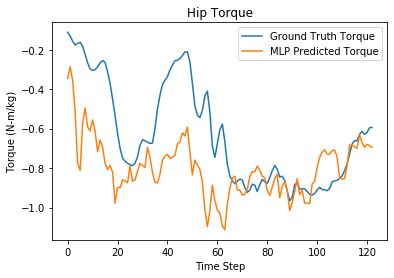

In [23]:
#Train for Hip



neural_net_hip = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=20000).fit(x_train_scaled, y_train.hip_torque)

res_hip = neural_net_hip.predict(x_test_scaled)

#Plot prediction vs ground truth of hip

rmse = np.sqrt(np.mean((res_hip - y_test.hip_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


import matplotlib.pyplot as plt

#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.hip_torque, label = "Ground Truth Torque")
plt.plot(res_hip, label = "MLP Predicted Torque")
plt.legend()
plt.title('Hip Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()

### Knee torque

Average Sum of Squared Error: 0.22220554957426347


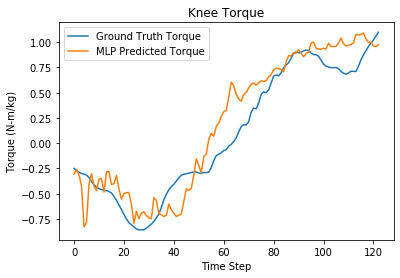

In [24]:

#Train for knee


neural_net_knee = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=20000).fit(x_train_scaled, y_train.knee_torque)

res_knee = neural_net_knee.predict(x_test_scaled)


#Plot prediction vs ground truth of knee
rmse = np.sqrt(np.mean((res_knee - y_test.knee_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)

import matplotlib.pyplot as plt

#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.knee_torque, label = "Ground Truth Torque")
plt.plot(res_knee, label = "MLP Predicted Torque")
plt.title('Knee Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.legend()
plt.show()

### L5-S1 Torque

Average Sum of Squared Error: 0.38795359962519704


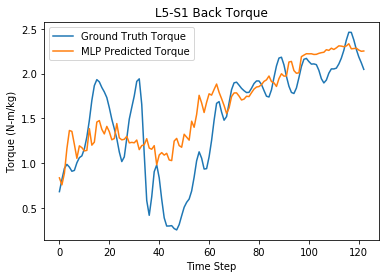

In [25]:
#Train for L5-S1


neural_net_L5_S1 = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=20000).fit(x_train_scaled, y_train.L5_S1_flex_torque)

res_L5_S1 = neural_net_L5_S1.predict(x_test_scaled)

#Plot prediction vs ground truth of L5-S1
rmse = np.sqrt(np.mean((res_L5_S1 - y_test.L5_S1_flex_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)

import matplotlib.pyplot as plt

#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.L5_S1_flex_torque, label = "Ground Truth Torque")
plt.plot(res_L5_S1, label = "MLP Predicted Torque")
plt.title('L5-S1 Back Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.legend()
plt.show()

# Linear Regression

In [26]:

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Train for Hip
sc=StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Hip Torque

Average Sum of Squared Error: 0.22179638282403777


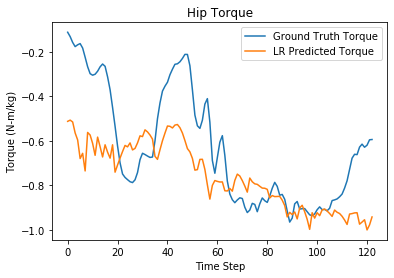

In [27]:

# Create Model
LR_hip = LinearRegression()
LR_hip.fit(x_train_scaled,y_train.hip_torque)


#Predict the test set results 

y_pred_hip =  LR_hip.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_hip - y_test.hip_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.hip_torque, label = "Ground Truth Torque")
plt.plot(y_pred_hip, label = "LR Predicted Torque")
plt.legend()
plt.title('Hip Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()





### Knee Torque

Average Sum of Squared Error: 0.2513352874384408


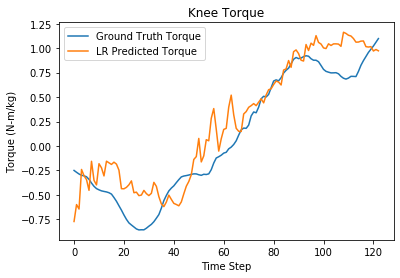

In [28]:
# Create Model
LR_knee = LinearRegression()
LR_knee.fit(x_train_scaled,y_train.knee_torque)

#Predict the test set results 

y_pred_knee =  LR_knee.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_knee - y_test.knee_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)

#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.knee_torque, label = "Ground Truth Torque")
plt.plot(y_pred_knee, label = "LR Predicted Torque")
plt.legend()
plt.title('Knee Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()




### L5-S1 Torque

Average Sum of Squared Error: 0.38471826484712557


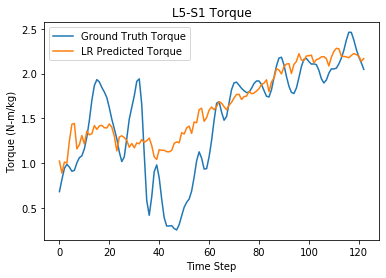

In [29]:
# Create Model
LR_L5S1 = LinearRegression()
LR_L5S1.fit(x_train_scaled,y_train.L5_S1_flex_torque)

#Predict the test set results 

y_pred_L5S1 =  LR_L5S1.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_L5S1 - y_test.L5_S1_flex_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.L5_S1_flex_torque, label = "Ground Truth Torque")
plt.plot(y_pred_L5S1, label = "LR Predicted Torque")
plt.legend()
plt.title('L5-S1 Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()



# XGBoost

In [30]:

from xgboost import XGBRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Train for Hip
sc=StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Hip Torque

C:\Users\jfernandez75\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jfernandez75\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[07:33:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average Sum of Squared Error: 0.24976545323874957


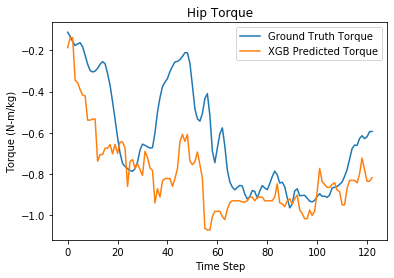

In [31]:

# Create Model
model_hip = XGBRegressor()
model_hip.fit(x_train_scaled,y_train.hip_torque)

#Predict the test set results 

y_pred_hip =  model_hip.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_hip - y_test.hip_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)



#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.hip_torque, label = "Ground Truth Torque")
plt.plot(y_pred_hip, label = "XGB Predicted Torque")
plt.legend()
plt.title('Hip Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()



### Knee Torque

[07:33:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average Sum of Squared Error: 0.26081194826286697


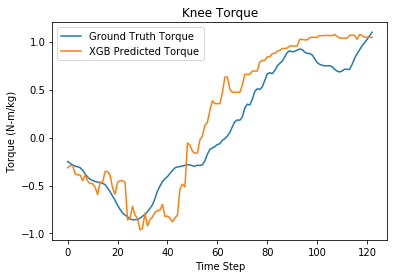

In [32]:

# Create Model
model_knee = XGBRegressor()
model_knee.fit(x_train_scaled,y_train.knee_torque)

#Predict the test set results 

y_pred_knee =  model_knee.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_knee - y_test.knee_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.knee_torque, label = "Ground Truth Torque")
plt.plot(y_pred_knee, label = "XGB Predicted Torque")
plt.legend()
plt.title('Knee Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()



### L5-S1 Torque

[07:33:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average Sum of Squared Error: 0.4797972010007825


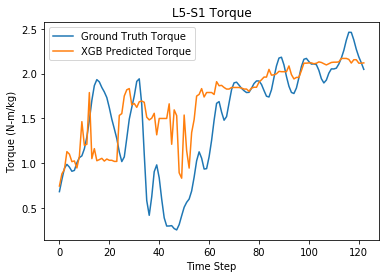

In [33]:

# Create Model
model_L5S1 = XGBRegressor()
model_L5S1.fit(x_train_scaled,y_train.L5_S1_flex_torque)

#Predict the test set results 

y_pred_L5S1 =  model_L5S1.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_L5S1 - y_test.L5_S1_flex_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.L5_S1_flex_torque, label = "Ground Truth Torque")
plt.plot(y_pred_L5S1, label = "XGB Predicted Torque")
plt.legend()
plt.title('L5-S1 Torque')
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()



## Use ML trained on 0 degree lifts to predict 90/180 degree lifts


In [34]:


lift_type = 'WK'
lift_degree = 180
subject_num = 4
lift_side = "L"
i = 4
# e.i. DOE_Biomech_04_L_90_L_WK_01.csv
filename = "DOE_Biomech_0"+str(subject_num)+"_L_"+str(lift_degree)+"_"+lift_side+"_"+lift_type+"_0"+str(i)+".csv"
#print(filename)
file = "D:/Dropbox (GaTech)/DOE_Exos/Experiments/Analysis/scale_ik_id/results/feature_tables/100_ms_window_20_ms_increment/"+filename





data_test = pd.read_csv(file)


x_test = data_test[feature_table_names]
y_test = data_test[ground_truth_names]

#print(x_train)
#print(x_test)
#print(y_test)

x_test_scaled = scaler.transform(x_test)



##### Predict hip ######
y_pred_hip =  model_hip.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_hip - y_test.hip_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)



#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.hip_torque, label = "Ground Truth Torque")
plt.plot(y_pred_hip, label = "XGB Predicted Torque")
plt.legend()
plt.title('Hip Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()

### Predict Knee ###


y_pred_knee =  model_knee.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_knee - y_test.knee_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.knee_torque, label = "Ground Truth Torque")
plt.plot(y_pred_knee, label = "XGB Predicted Torque")
plt.legend()
plt.title('Knee Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()

### Predict back ###

y_pred_L5S1 =  model_L5S1.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_L5S1 - y_test.L5_S1_flex_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.L5_S1_flex_torque, label = "Ground Truth Torque")
plt.plot(y_pred_L5S1, label = "XGB Predicted Torque")
plt.legend()
plt.title('L5-S1 Torque')
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()







FileNotFoundError: [Errno 2] File b'D:/Dropbox (GaTech)/DOE_Exos/Experiments/Analysis/scale_ik_id/results/feature_tables/100_ms_window_20_ms_increment/DOE_Biomech_04_L_180_L_WK_04.csv' does not exist: b'D:/Dropbox (GaTech)/DOE_Exos/Experiments/Analysis/scale_ik_id/results/feature_tables/100_ms_window_20_ms_increment/DOE_Biomech_04_L_180_L_WK_04.csv'

## Use ML Trained on a single subject to predict lifts on other subjects

Average Sum of Squared Error: 0.238067621038493


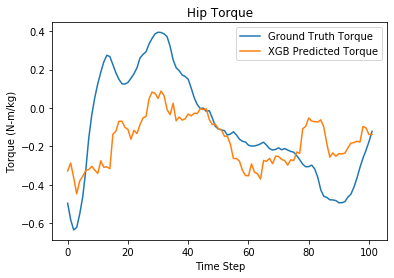

Average Sum of Squared Error: 0.39669518434148293


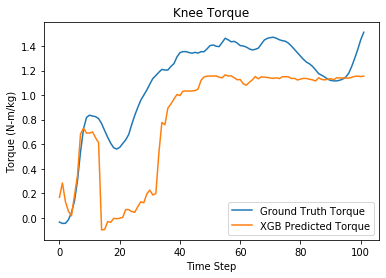

Average Sum of Squared Error: 0.46395662690656037


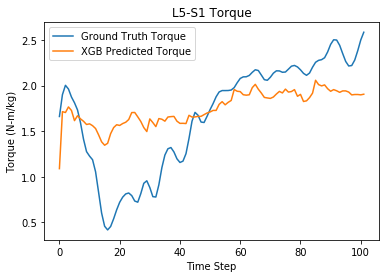

In [34]:


lift_type = 'WK'
lift_degree = 0
subject_num = 9
lift_side = "L"
i = 5
# e.i. DOE_Biomech_04_L_90_L_WK_01.csv
filename = "DOE_Biomech_0"+str(subject_num)+"_L_"+str(lift_degree)+"_"+lift_type+"_0"+str(start_i)+".csv"

#print(filename)
file = "D:/Dropbox (GaTech)/DOE_Exos/Experiments/Analysis/scale_ik_id/results/feature_tables/100_ms_window_20_ms_increment/"+filename





data_test = pd.read_csv(file)


x_test = data_test[feature_table_names]
y_test = data_test[ground_truth_names]

#print(x_train)
#print(x_test)
#print(y_test)

x_test_scaled = scaler.transform(x_test)



##### Predict hip ######
y_pred_hip =  model_hip.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_hip - y_test.hip_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)



#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.hip_torque, label = "Ground Truth Torque")
plt.plot(y_pred_hip, label = "XGB Predicted Torque")
plt.legend()
plt.title('Hip Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()

### Predict Knee ###


y_pred_knee =  model_knee.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_knee - y_test.knee_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.knee_torque, label = "Ground Truth Torque")
plt.plot(y_pred_knee, label = "XGB Predicted Torque")
plt.legend()
plt.title('Knee Torque') 
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()

### Predict back ###

y_pred_L5S1 =  model_L5S1.predict(x_test_scaled)

#Plot prediction vs ground truth of hip
rmse = np.sqrt(np.mean((y_pred_L5S1 - y_test.L5_S1_flex_torque)**2))
message = 'Average Sum of Squared Error: ' + str(rmse)
print(message)


#print(res)
#print(y_test.hip_torque)
# plot lines
plt.plot(y_test.L5_S1_flex_torque, label = "Ground Truth Torque")
plt.plot(y_pred_L5S1, label = "XGB Predicted Torque")
plt.legend()
plt.title('L5-S1 Torque')
plt.xlabel("Time Step")
plt.ylabel("Torque (N-m/kg)")
plt.show()





